In [1]:
%matplotlib inline
import numpy as np
import imageio

import matplotlib.pyplot as plt

In [2]:
img_b = imageio.imread('data/img_b.png')[:,:,0] /255

w, h = 10,10
x,y = 120,180
crop_img_b = img_b[y:y+h,x:x+w]

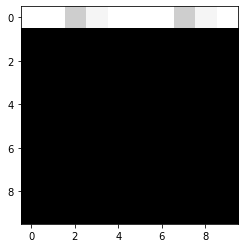

In [3]:
plt.imshow(crop_img_b
           , cmap='gray')

In [4]:
img_b.shape

(250, 250)

0.0


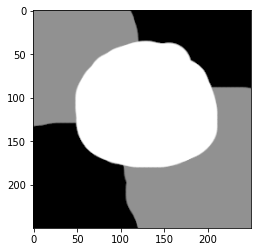

In [5]:
"""
// A recursive function to replace previous color 'prevC' at  '(x, y)' 
// and all surrounding pixels of (x, y) with new color 'newC' and
floodFil(screen[M][N], x, y, prevC, newC)
1) If x or y is outside the screen, then return.
2) If color of screen[x][y] is not same as prevC, then return
3) Recur for north, south, east and west.
    floodFillUtil(screen, x+1, y, prevC, newC);
    floodFillUtil(screen, x-1, y, prevC, newC);
    floodFillUtil(screen, x, y+1, prevC, newC);
    floodFillUtil(screen, x, y-1, prevC, newC); 
"""

from queue import Queue

def get_neighbors(img_shape, pos):
    y,x = pos
    
    h,w = img_shape
    

    north = (y+1, x  )
    south = (y-1, x  )
    west =  (y  , x-1)
    east =  (y  , x+1)
    
    return sorted(filter(lambda point: 
                       point[0] >= 0 and point[0] < h and
                        point[1] >= 0 and point[1] < w,
                       [north, south, east, west]))
    
    
def color_fill(img, pos, target_color):
    
    img = np.copy(img)
    
    color = img[pos]
    print(color)

    # Seen pixels
    seen = np.zeros(img.shape)

    queue = Queue()
    
    queue.put(pos)
    

    while not queue.empty():
        pos = queue.get_nowait()
        
        img[pos] = target_color
        
        neighbors = get_neighbors(img.shape, pos)

        for n in neighbors:
            if seen[n] == 0 and img[n] == color:
                seen[n] = 1
                queue.put(n)
    
    return img

painted = color_fill(img_b, (200,0),0)
plt.imshow(painted, cmap='gray')